# 7: Red Neuronal Recurrente LSTM

In [1]:
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM

# Ignorar las advertencias
import warnings; 
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

np.random.seed(1234)  
os.environ['PYTHONHASHSEED'] = '0'

df_train1 = pd.read_csv('df_train1_norm.csv')
df_train3 = pd.read_csv('df_train3_norm.csv')
df_train2 = pd.read_csv('df_train2_norm.csv')
df_train4 = pd.read_csv('df_train4_norm.csv')

df_test1 = pd.read_csv('df_test1_norm.csv')
df_test3 = pd.read_csv('df_test3_norm.csv')
df_test2 = pd.read_csv('df_test2_norm.csv')
df_test4 = pd.read_csv('df_test4_norm.csv')

Using TensorFlow backend.


In [2]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,...,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.005208,0
1,1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,...,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.010417,0
2,2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,...,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.015625,0
3,3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,...,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.020833,0
4,4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,...,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.026042,0


In [3]:
df_test1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,0,1.0,1.0,649.0,0.0,1.360364,-0.561570,-0.975963,-1.0,0.175502,...,-1.315395,-0.711751,-1.0,-0.462748,0.0,0.0,-0.229966,0.449751,142.0,0.006993
1,1,1.0,2.0,590.0,0.0,-1.908688,0.070163,-1.393351,-1.0,0.175502,...,0.066134,-1.570360,-1.0,0.348179,0.0,0.0,0.899592,0.665079,141.0,0.013986
2,2,1.0,3.0,45.0,0.0,-0.037093,-0.231709,-0.507711,-1.0,0.175502,...,-0.868632,0.629609,-1.0,0.348179,0.0,0.0,1.323176,0.962492,140.0,0.020979
3,3,1.0,4.0,397.0,0.0,-0.087003,-0.795471,0.252264,-1.0,0.175502,...,-0.593701,-1.177262,-1.0,-1.273674,0.0,0.0,0.758397,0.452130,139.0,0.027972
4,4,1.0,5.0,247.0,0.0,0.087679,-0.181730,-0.420942,-1.0,0.175502,...,-0.923618,-0.784164,-1.0,-2.084601,0.0,0.0,0.687800,0.919665,138.0,0.034965


In [4]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df_train4.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,1523,-1.054573,-0.830222,-0.727102,-0.759068,-1.137525,-1.085435,-1.032105,...,0.073273,-0.694278,-0.672665,-0.114452,0.418577,-1.069259,-1.073505,320.0,0.003115,0
1,1.0,2.0,1430,0.692543,-0.840362,0.581425,0.325978,0.364013,0.381295,-1.029170,...,-0.126106,-0.694278,-0.691356,0.655747,0.418577,0.364182,0.365361,319.0,0.006231,0
2,1.0,3.0,2219,-1.054573,-0.850503,-0.730125,-0.723181,-1.137525,-1.087290,-1.026235,...,-0.024033,-0.694278,-0.710048,-0.114452,0.418577,-0.356708,-1.064078,318.0,0.009346,0
3,1.0,4.0,1815,-1.054573,-1.028996,-1.158678,-0.714645,-1.137525,-1.085435,-1.027667,...,0.078040,-0.694278,-0.747431,-0.114452,0.418577,-0.535237,-1.064720,317.0,0.012461,0
4,1.0,5.0,3632,-0.391130,-0.858906,-1.587231,-0.719088,-0.270828,-0.473525,-0.763988,...,2.180772,-0.694278,-1.607243,-2.156853,-2.389313,-0.578631,-0.848748,316.0,0.015576,0


In [6]:
df_test4.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm
0,1.0,1.0,1914.0,0.702036,0.743370,0.626895,0.257933,0.373856,0.379826,0.346807,...,-0.169114,-0.082979,-0.659188,0.544247,0.658809,0.417078,0.355390,0.374624,251.0,0.003968
1,1.0,2.0,1609.0,-0.386443,-1.154058,-1.506155,-1.402996,-0.264667,-0.470364,-0.737082,...,-2.374385,2.120752,-0.659188,-1.484405,-2.164472,-2.397634,-0.651657,-0.658639,250.0,0.007937
2,1.0,3.0,9621.0,-1.052828,-0.803660,-0.709735,-0.773581,-1.136389,-1.082131,-0.991631,...,0.094183,0.149579,-0.659188,-0.687435,-0.114315,0.417078,-1.053464,-1.019309,249.0,0.011905
3,1.0,4.0,4139.0,-1.052828,-0.804737,-0.713814,-0.761906,-1.136389,-1.082131,-0.992385,...,0.186426,0.100407,-0.659188,-0.687435,-0.114315,0.417078,-1.036258,-1.053009,248.0,0.015873
4,1.0,5.0,2003.0,-0.884142,-0.645563,-0.587275,-0.672739,-0.700528,-0.660733,-0.610356,...,-0.063914,0.024634,-0.659188,-0.506305,-0.038383,0.417078,-0.602064,-0.598289,247.0,0.019841


# Ventana de operación

In [7]:
# Se seleccionará una ventana de 50 ciclos.
ventana = 50

# Ajuste de datos para la entrada de las LSTM

In [8]:
# Función de ajuste de los datos de entrada (samples, time steps, features) 
def gen_sequence(datos, ventana, features):

    # Para una misma unitNumber se colocan los valores de los sensores en una matriz simple (vector).
    
    data_matriz = datos[features].values
    num_elementos = data_matriz.shape[0]
    
    # Por ejemplo, para el id 1 se tienen 192 filas y la ventana es igual a 50
    # por lo que se va a iterar en una lista que que incluya la ventana de la siguiente manera:
    
    # 0 - 50 -> de la row 0 a row 50
    # 1 - 51 -> de la row 1 a row 51
    # 2 - 52 -> de la row 2 a row 52
    # ...
    # 141 - 191 -> from row 141 to 191
    
    for start, stop in zip(range(0, num_elementos-ventana), range(ventana, num_elementos)):
        yield data_matriz[start:stop, :]

In [9]:
# Se toman los features o atributos.

sequence_cols = ['opset_id', 'rul'] + ['sensorMeasure' + str(i) for i in range(1,22)]
sequence_cols

# val es una lista para validar que incluye (192 - 50 = 142) arreglo bi-dimensional (50 rows x 25 columns)
val=list(gen_sequence(df_train1[df_train1['unitNumber'] == 1], ventana, sequence_cols))
print(len(val))

# generador para la secuencia
seq_gen = (list(gen_sequence(df_train1[df_train1['unitNumber'] == id], ventana, sequence_cols))
           for id in df_train1['unitNumber'].unique())

# genero la secuencia y lo convierto en un array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

142


(15631, 50, 23)

In [10]:
# Función para generar los RUL
def gen_labels(datos, ventana, label):
    
    # Para un unitNumber determinado, se colocan los valores de RUL dentro de una matriz simple (vector).
    
    # Por ejemplo:
    # [[1]
    # [2]
    # [3]
    # [4]
    # [5]
    # ...
    # [200]] 
    
    data_matriz = datos[label].values
    num_elementos = data_matriz.shape[0]

    return data_matriz[ventana:num_elementos, :]

# Obtengo los RUL finales por ventana
label_gen = [gen_labels(df_train1[df_train1['unitNumber'] == id], ventana, ['rul_norm']) 
             for id in df_train1['unitNumber'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(15631, 1)

# Construcción de la Red Neuronal

Crearé una función que me permite evaluar el **coeficiente de determinación**

In [11]:
def r2(y_true, y_pred):
    """Coeficiente de determinación
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

**Ahora construiremos la red neuronal.**
* La primera capa seran neuronas LSTM con 100 unidades seguidas de otra capa LSTM con 50 unidades.
* Se empleará el *Dropout* luego de cada capa para controlar el **overfitting.**
* La última capa será una capa *Dense* de salida con una sola unidad donde se empleará la función de activación lineal debido a que es un problema de **regresión**.

<img src="http://oi67.tinypic.com/34sp94x.jpg">

In [12]:
numero_features = seq_array.shape[2]
salida = label_array.shape[1]

model = Sequential()

#Primera capa
model.add(LSTM(input_shape=(ventana, numero_features), units=64, return_sequences=True))
model.add(Dropout(0.5))

#Segunda capa
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(units=8))
model.add(Activation("sigmoid"))

model.add(Dense(units=8))
model.add(Activation("sigmoid"))

#Última capa
model.add(Dense(units=salida))
model.add(Activation("linear"))

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', r2])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 64)            22528     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
__________

# Ajustando la Red Neuronal

In [13]:
model_path = 'regression_model.h5'

history = model.fit(seq_array, label_array, epochs=100, batch_size=500, validation_split=0.2, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0),
                       keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)]
          )

# list all data in history
print(history.history.keys())

Train on 12504 samples, validate on 3127 samples
Epoch 1/100
 - 10s - loss: 3.1126 - mean_absolute_error: 1.7433 - r2: -6.3360e+01 - val_loss: 2.2543 - val_mean_absolute_error: 1.4841 - val_r2: -4.4299e+01
Epoch 2/100
 - 7s - loss: 2.0186 - mean_absolute_error: 1.4016 - r2: -4.0818e+01 - val_loss: 1.6081 - val_mean_absolute_error: 1.2476 - val_r2: -3.1326e+01
Epoch 3/100
 - 8s - loss: 1.4390 - mean_absolute_error: 1.1776 - r2: -2.8785e+01 - val_loss: 1.1407 - val_mean_absolute_error: 1.0435 - val_r2: -2.1940e+01
Epoch 4/100
 - 8s - loss: 1.0044 - mean_absolute_error: 0.9760 - r2: -1.9794e+01 - val_loss: 0.7775 - val_mean_absolute_error: 0.8519 - val_r2: -1.4644e+01
Epoch 5/100
 - 8s - loss: 0.6637 - mean_absolute_error: 0.7822 - r2: -1.2750e+01 - val_loss: 0.4891 - val_mean_absolute_error: 0.6613 - val_r2: -8.8472e+00
Epoch 6/100
 - 7s - loss: 0.3973 - mean_absolute_error: 0.5877 - r2: -7.2246e+00 - val_loss: 0.2691 - val_mean_absolute_error: 0.4663 - val_r2: -4.4214e+00
Epoch 7/100
 -

# Graficos

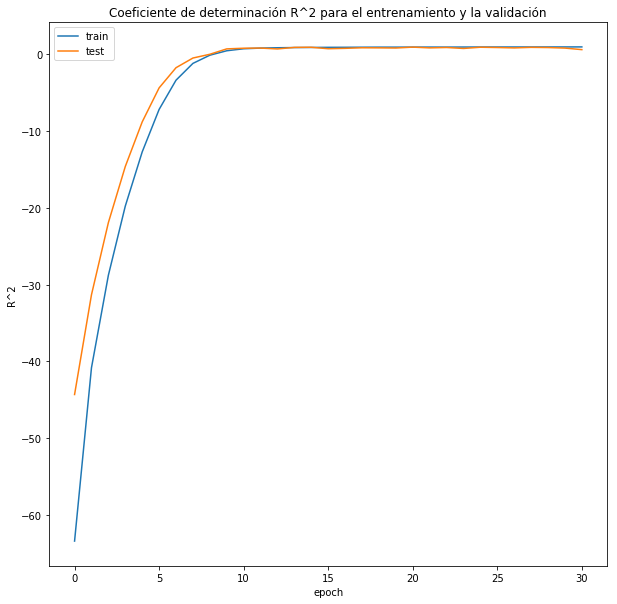

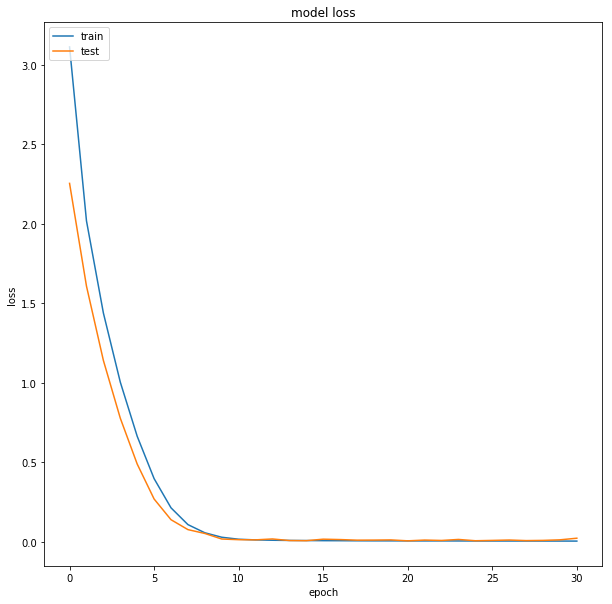

15631/15631 [==============================] - 3s 177us/step

MAE: 0.0997865702557717

R^2: 0.653587859801509
15631/15631 [==============================] - 3s 174us/step


In [23]:
# Historial para el R^2
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('Coeficiente de determinación R^2 para el entrenamiento y la validación')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_r2.png")

"""# Historial para el MAE
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_mae.png")
"""
# Historial para el Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_regression_loss.png")

# Metricas de entrenamiento
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nR^2: {}'.format(scores[2]))

y_pred = model.predict(seq_array, verbose=1, batch_size=200)
y_real = label_array

test_set = pd.DataFrame(y_pred)

In [15]:
test_set.head()

,0
0,0.220454
1,0.219258
2,0.221276
3,0.221437
4,0.221852


# Probando la Red Neuronal con los datos de prueba.

seq_array_test_last
(93, 50, 23)
label_array_test_last
(93, 1)

MAE: 0.07207925970195442

R^2: 0.7767582446016291


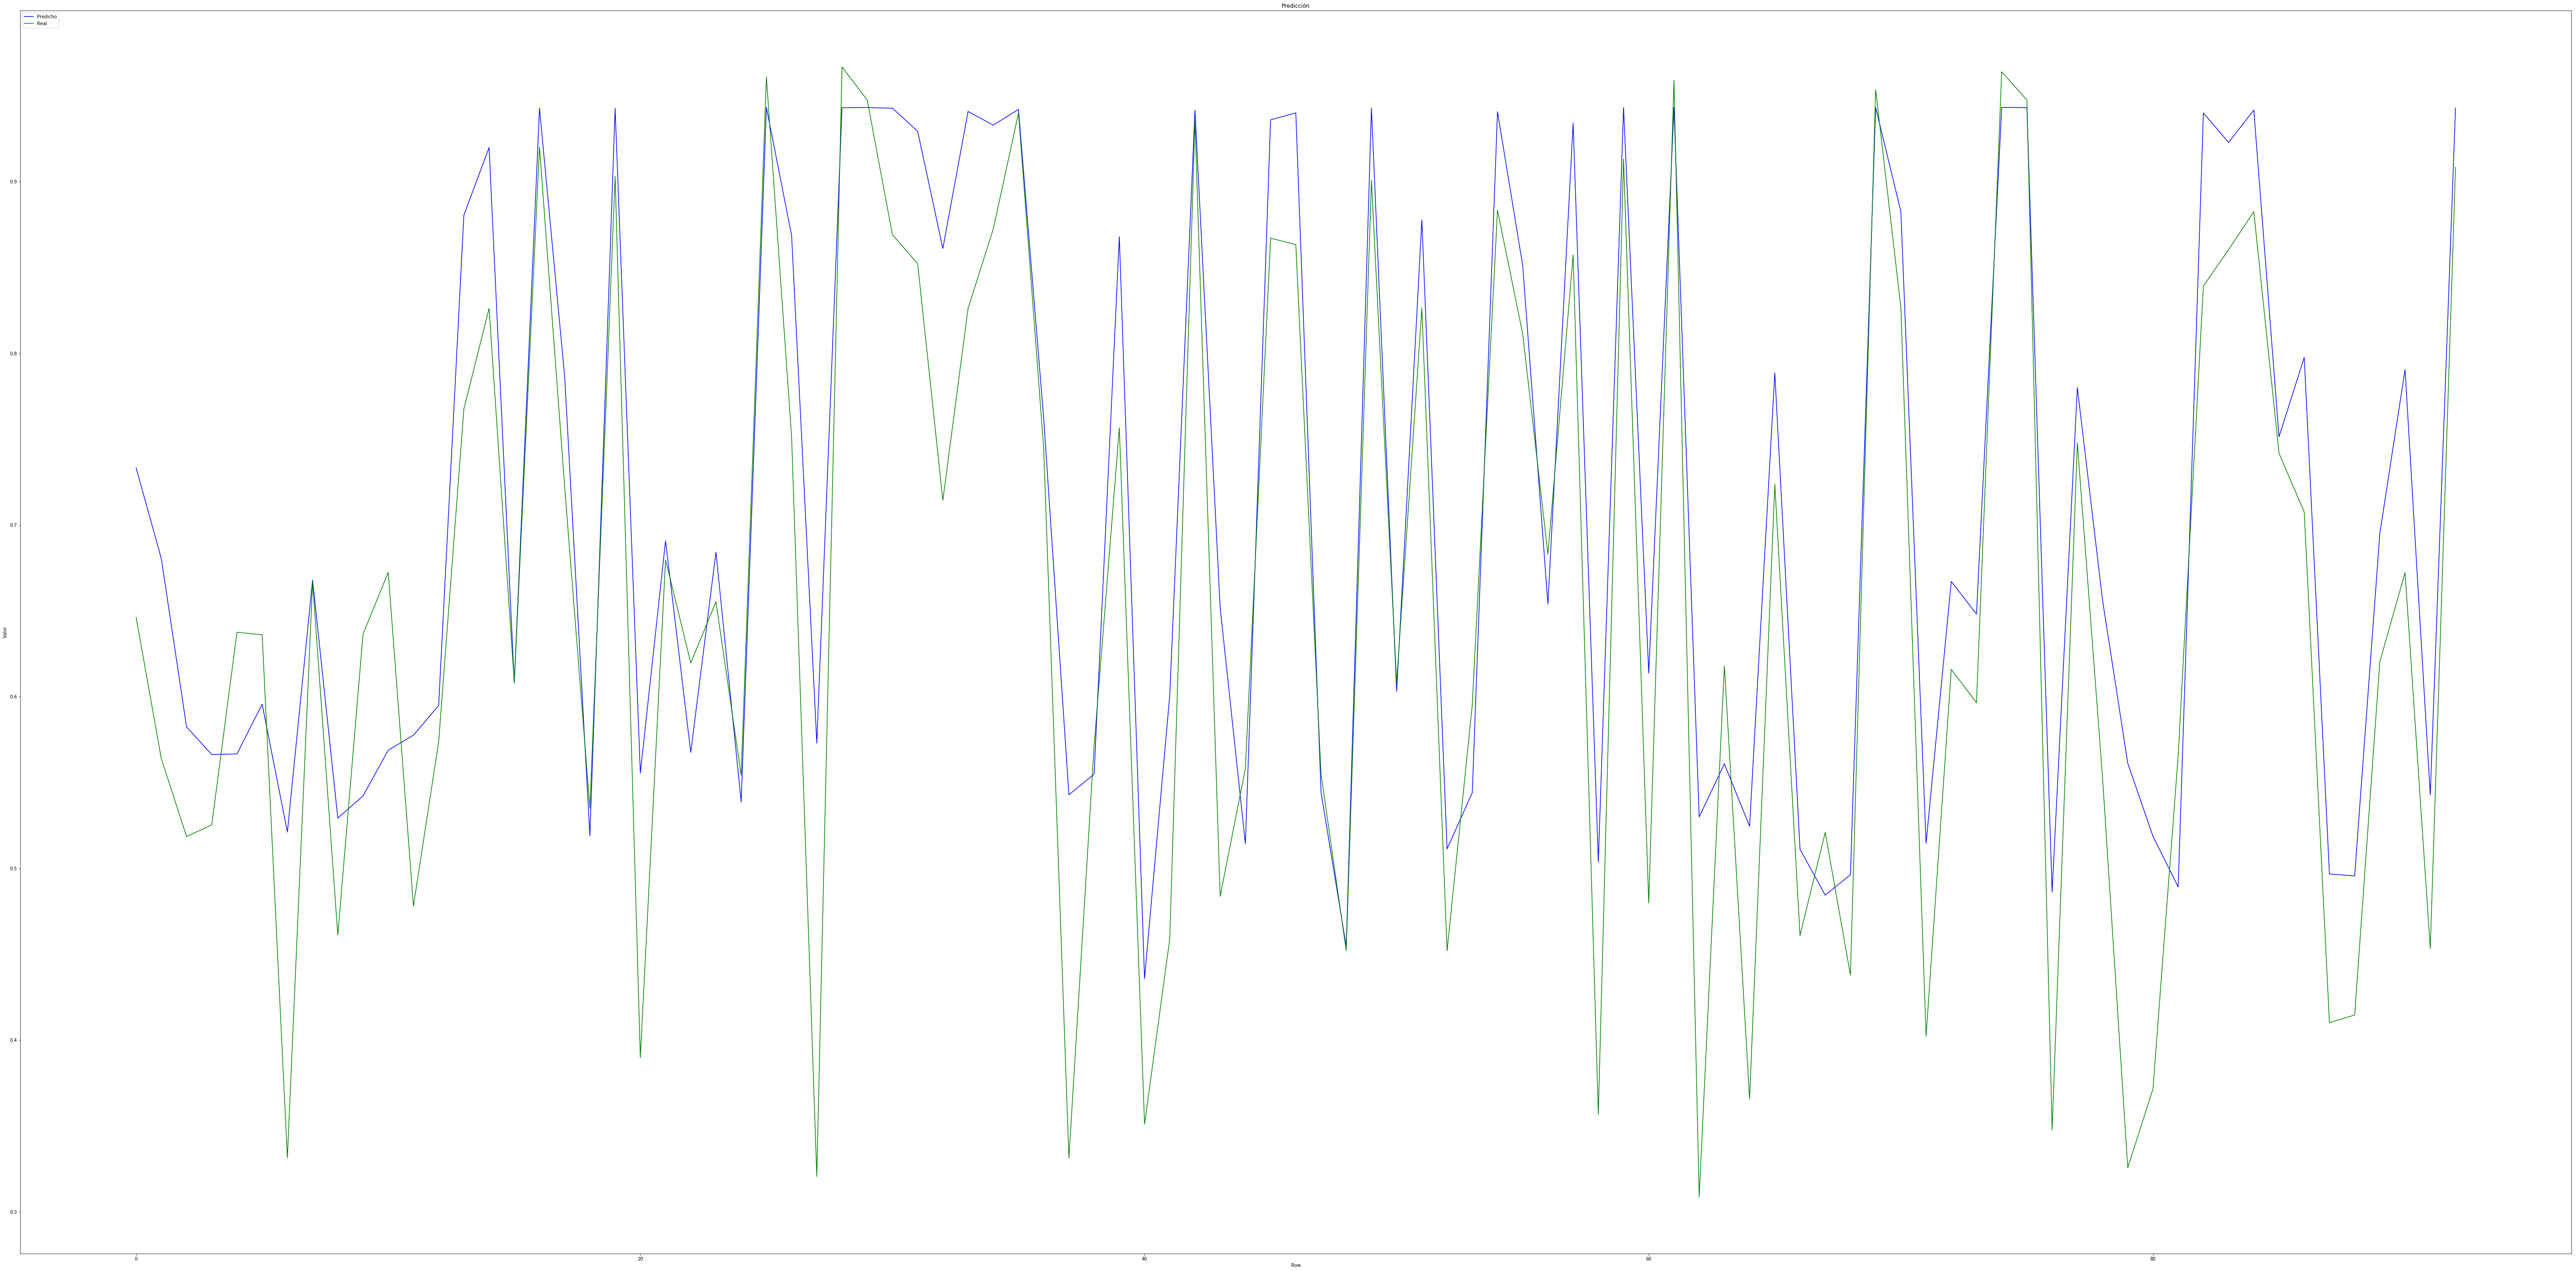

In [20]:
# Se seleccionará la ultima ventana para cada máquina de los datos de prueba.

seq_array_test_last = [df_test1[df_test1['unitNumber']==id][sequence_cols].values[-ventana:] 
                       for id in df_test1['unitNumber'].unique() if 
                       len(df_test1[df_test1['unitNumber']==id]) >= ventana]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

print("seq_array_test_last")
print(seq_array_test_last.shape)

# De manera similar tomaremos los RUL

y_mask = [len(df_test1[df_test1['unitNumber']==id]) >= ventana for id in df_test1['unitNumber'].unique()]
label_array_test_last = df_test1.groupby('unitNumber')['rul_norm'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

print("label_array_test_last")
print(label_array_test_last.shape)

# Se carga el mejor modelo de iteración y se usa.
if os.path.isfile(model_path):
    estimator = load_model(model_path, custom_objects={'r2': r2})

    # metricas de prueba
    scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
    print('\nMAE: {}'.format(scores_test[1]))
    print('\nR^2: {}'.format(scores_test[2]))

    y_pred_test = estimator.predict(seq_array_test_last)
    y_true_test = label_array_test_last

    test_set_1 = pd.DataFrame(y_pred_test)

    # Se grafica en color azul los datos predichos y en color verde
    # los dastos reales para verficiar la exactitud del modelo.
    
    fig_verify = plt.figure(figsize=(100, 50))
    plt.plot(y_pred_test, color="blue")
    plt.plot(y_true_test, color="green")
    plt.title('Predicción')
    plt.ylabel('Valor')
    plt.xlabel('Row')
    plt.legend(['Predicho', 'Real'], loc='upper left')
    plt.show()
    fig_verify.savefig("model_regression_verify.png")

In [19]:
print('\nValores reales:')
print(label_array_test_last.T)


Valores reales:
[[0.64615387 0.5638298  0.5185185  0.5252525  0.6374502  0.6360153
  0.3313253  0.6666667  0.4611111  0.6363636  0.67241377 0.4779874
  0.57360405 0.76744187 0.82608694 0.6081081  0.92       0.72195125
  0.5349794  0.9029126  0.3897436  0.6796116  0.61960787 0.6551724
  0.5542636  0.9607843  0.7512953  0.32051283 0.96666664 0.94736844
  0.8689655  0.85211265 0.71428573 0.82608694 0.87234044 0.939759
  0.74458873 0.33128834 0.5714286  0.7564767  0.35096154 0.45882353
  0.9351852  0.48366013 0.55813956 0.8669725  0.86315787 0.55504584
  0.452      0.90066224 0.608365   0.8262911  0.45192307 0.5951417
  0.8833333  0.8111888  0.68281937 0.85714287 0.35678393 0.9130435
  0.47972974 0.95897436 0.30857143 0.6178862  0.3655914  0.7237569
  0.46090534 0.5209125  0.43781096 0.95348835 0.82653064 0.40223464
  0.61585367 0.59641254 0.9638009  0.94736844 0.34761906 0.7478261
  0.5527638  0.3255814  0.3715847  0.5654952  0.83908045 0.8602941
  0.88235295 0.74164134 0.7074468  0.4101

In [18]:
print('\nValores predichos:')
test_set_1.T


Valores predichos:


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.733188,0.680351,0.582349,0.566242,0.566635,0.59555,0.521107,0.667812,0.529258,0.542141,...,0.922682,0.941556,0.751291,0.797466,0.496706,0.495597,0.695168,0.790465,0.542777,0.942794
